# House Price Prediction - Assignment

From the given data set, understand what factors are affecting the price of a house

**Problem Statement**

Identify which variables are significant in predicting price of a house





### To start with, import all the needed packages in the start of execution only. 

In [1]:
#import the libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
#import the plotting libraries
import matplotlib.pyplot as plt
%matplotlib inline

### Set few of the options needed for getting a better display on the output

Using pandas do load the given CSV file which is size ~452 KB.
 

In [2]:
# Set few options for Dataframe which will be helpfull in viewing the output
pd.set_option('display.max_column', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_seq_items', None)
pd.set_option('display.max_colwidth', 100)
pd.set_option('expand_frame_repr', True)
#Check the datatypes of all the columns of the dataframe
housepricing = pd.read_csv('train.csv')
housepricing.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [3]:
#Get the total number of rows and columns  present
housepricing.shape

(1460, 81)

In [4]:
#Get the view of the data set by printing first 5 rows
housepricing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Data Cleaning

In [5]:
#Do check for the columns having values as null. Based on that we might need to handle data cleaning up activity
housepricing.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

From the data definitions given in the references file(DataDefinition.txt) we can see we have 14 columns which have NA as one of the possbile value in this column.
To have a right representation, changing the value to appropriate value so that it can be used in the prediction model.

In [6]:
columns_havingNA =['Alley','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PoolQC','Fence','MiscFeature']
column_value = ['No_alley','No_Basement','No_Basement','No_Basement','No_Basement','No_Basement','No_Fireplace','No_Garage','No_Garage','No_Garage','No_Garage','No_Pool','No_Fence','NoneFeature']
i=0
for colname in columns_havingNA:
    housepricing[colname].fillna(column_value[i], inplace=True)
    i=i+1

In [7]:
for columnname in housepricing.columns:
    if housepricing[columnname].isnull().sum() > 0:
        print(columnname +'with null count  ', housepricing[columnname].isnull().sum())


LotFrontagewith null count   259
MasVnrTypewith null count   8
MasVnrAreawith null count   8
Electricalwith null count   1
GarageYrBltwith null count   81


After the above cleanup we can see only two columns LotFrontage and GarageYrBlt have a bigger count w.r.to cells having NA or NaN values.       

In [8]:
housepricing.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
Street              2
Alley               3
LotShape            4
LandContour         4
Utilities           2
LotConfig           5
LandSlope           3
Neighborhood       25
Condition1          9
Condition2          8
BldgType            5
HouseStyle          8
OverallQual        10
OverallCond         9
YearBuilt         112
YearRemodAdd       61
RoofStyle           6
RoofMatl            8
Exterior1st        15
Exterior2nd        16
MasVnrType          4
MasVnrArea        327
ExterQual           4
ExterCond           5
Foundation          6
BsmtQual            5
BsmtCond            5
BsmtExposure        5
BsmtFinType1        7
BsmtFinSF1        637
BsmtFinType2        7
BsmtFinSF2        144
BsmtUnfSF         780
TotalBsmtSF       721
Heating             6
HeatingQC           5
CentralAir          2
Electrical          5
1stFlrSF          753
2ndFlrSF          417
LowQualFin

In [9]:
#Droping column name "Id" as this is having a unquie values and doesnot have any impact on the prediction of house sale price
housepricing = housepricing.drop(['Id'], axis=1)

Missing Value Treatment

In [10]:
# 'LotFrontage' datatype is float, get the median and replace empty cells using median value.
housepricing['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [11]:
housepricing['LotFrontage'].fillna(housepricing['LotFrontage'].median(), inplace=True)

In [12]:
# 'MasVnrArea' datatype is float, get the median and replace empty cells using median value.
housepricing['MasVnrArea'].describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [13]:
housepricing['MasVnrArea'].fillna(housepricing['MasVnrArea'].median(), inplace=True)

In [14]:
# 'GarageYrBlt' datatype is float, get the median and replace empty cells using median value.
housepricing['GarageYrBlt'].describe()

count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

In [15]:
housepricing['GarageYrBlt'].fillna(housepricing['GarageYrBlt'].median(), inplace=True)

In [16]:
# Compute the mode for 'MasVnrType' column and impute missing values using mode value.
mode_value = housepricing['MasVnrType'].mode()[0]
# Fill the missing values with mode
housepricing['MasVnrType'].fillna(mode_value, inplace=True)


In [17]:
# Compute the mode for 'MasVnrType' column and impute missing values using mode value.
mode_value = housepricing['Electrical'].mode()[0]
# Fill the missing values with mode
housepricing['Electrical'].fillna(mode_value, inplace=True)

In [18]:
print('Total columuns having null values ', housepricing.isna().sum().sum())

Total columuns having null values  0


In [19]:
#From the data definition, we see 'MSSubClass','OverallQual','OverallCond' column should be categorical type but right now its of type int.
#Coverting this column data type to object so that we can use it in categorical angle.
housepricing['MSSubClass'] = housepricing['MSSubClass'].astype(object)
housepricing['OverallQual'] = housepricing['OverallQual'].astype(object)
housepricing['OverallCond'] = housepricing['OverallCond'].astype(object)

In [20]:
housepricing.dtypes

MSSubClass        object
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual       object
OverallCond       object
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object
HeatingQC         object


Right now we do not have any columns having empty,NA or NaN values.

### EDA (Start)

In [21]:
numerical_colums = list(housepricing.select_dtypes(['int64','float64']).columns)
# remove last element which is 'SalePrice'. This column is a target column so not including it in our numerical type.
numerical_colums.pop() 
print(numerical_colums)

['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


In [22]:
categorical_colums = list(housepricing.select_dtypes(['object']).columns)
print(categorical_colums)

['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [23]:
print(len(numerical_colums))
print(len(categorical_colums))

33
46


#### Univariate Analysis for categorical columns

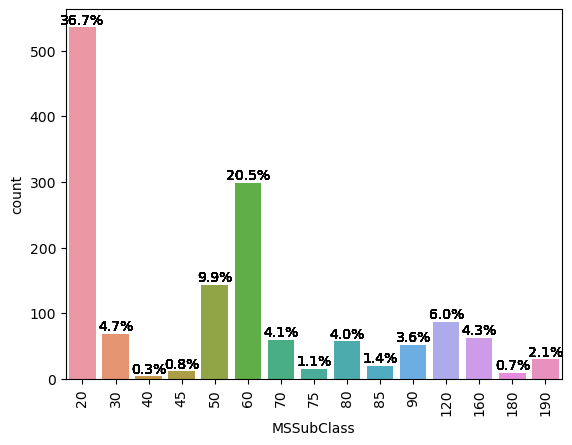

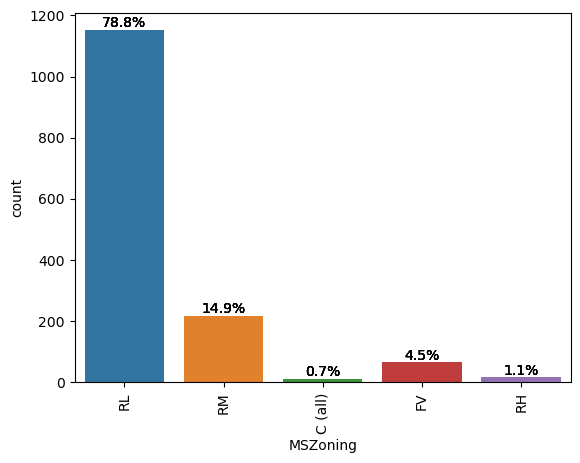

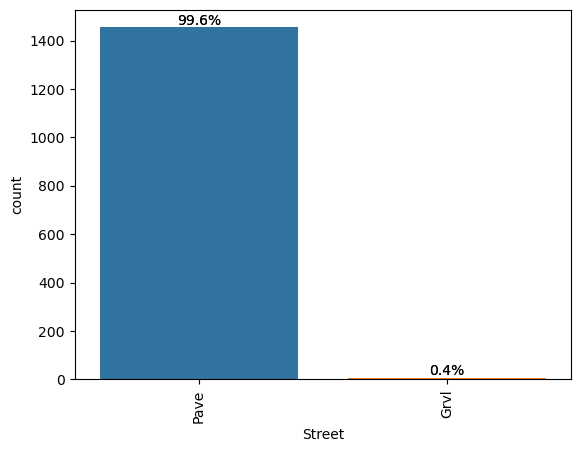

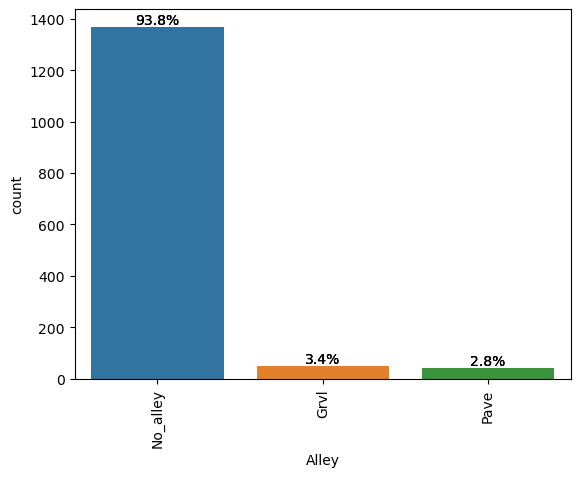

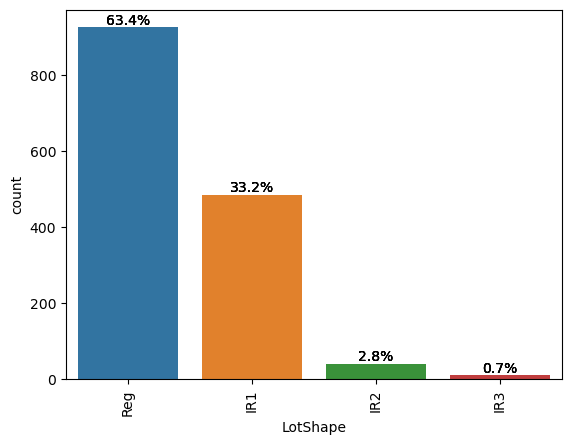

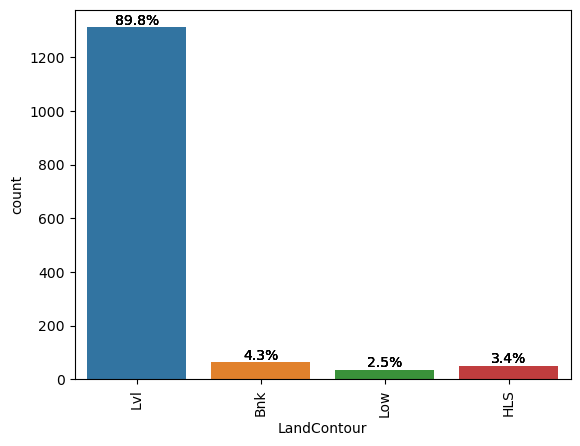

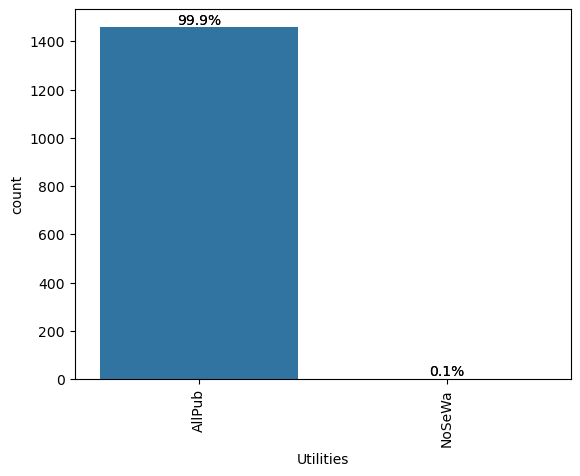

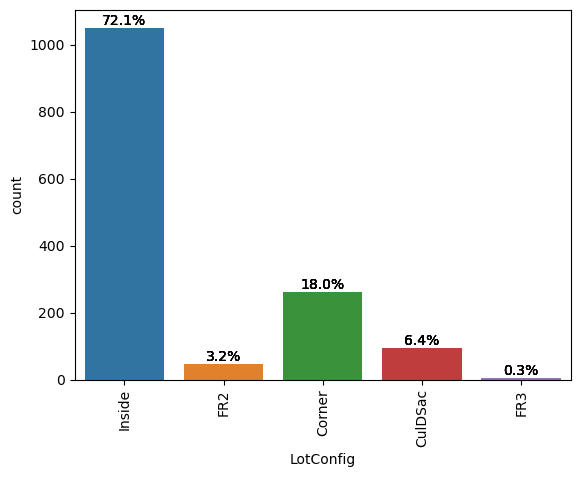

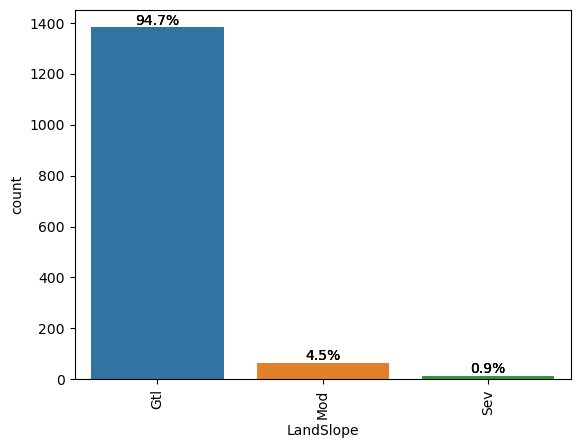

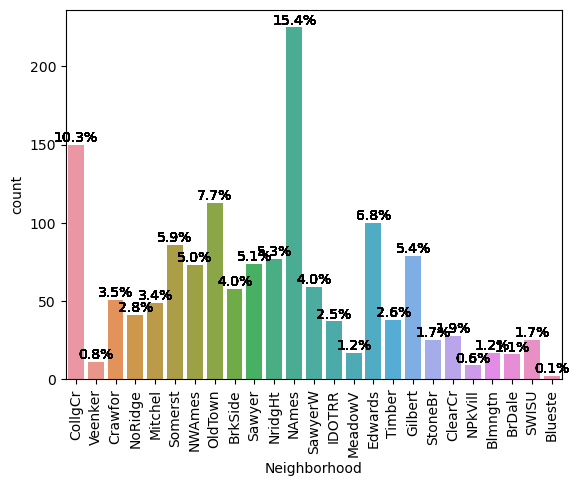

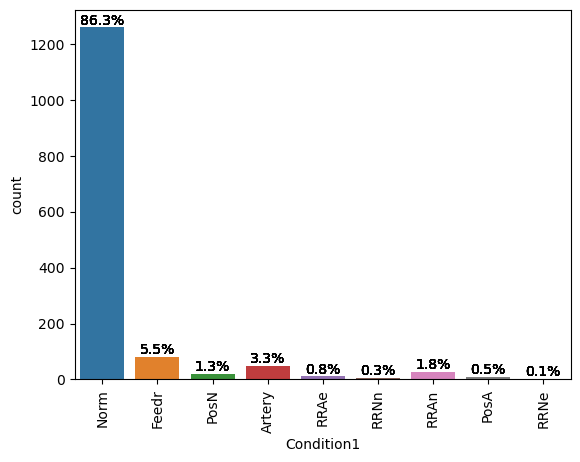

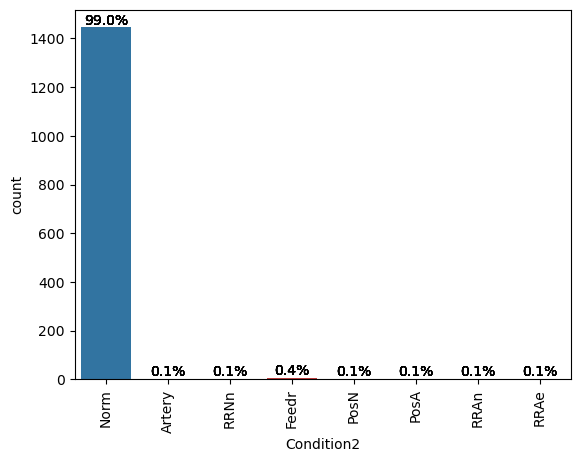

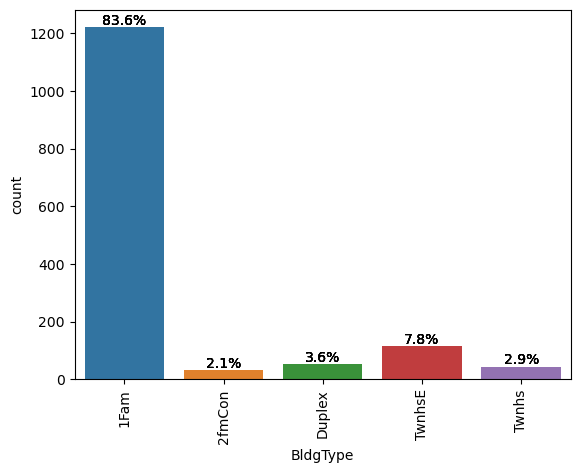

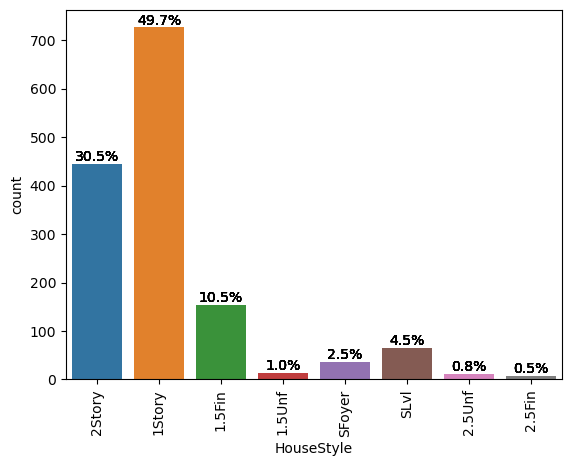

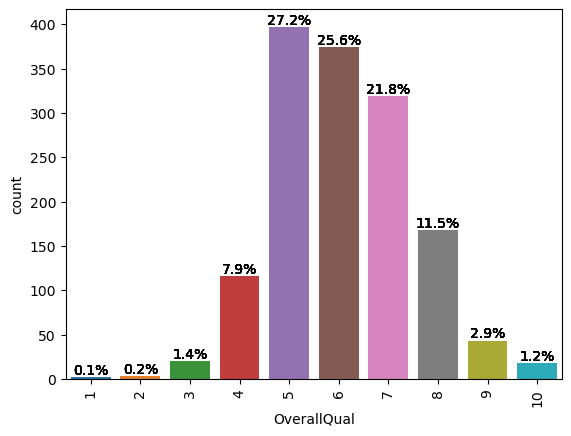

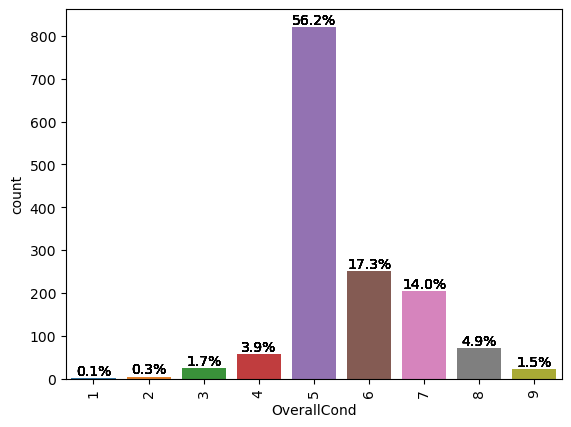

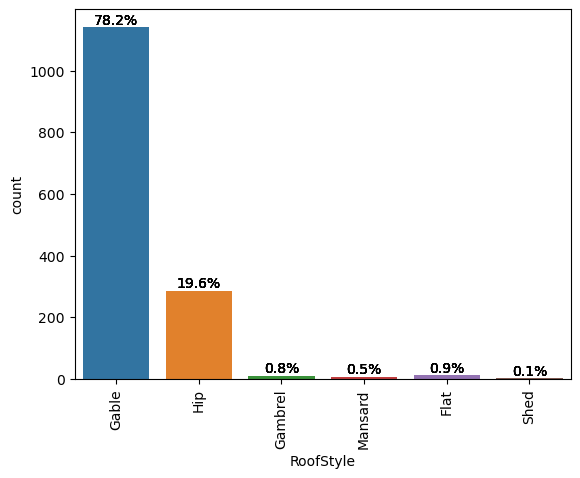

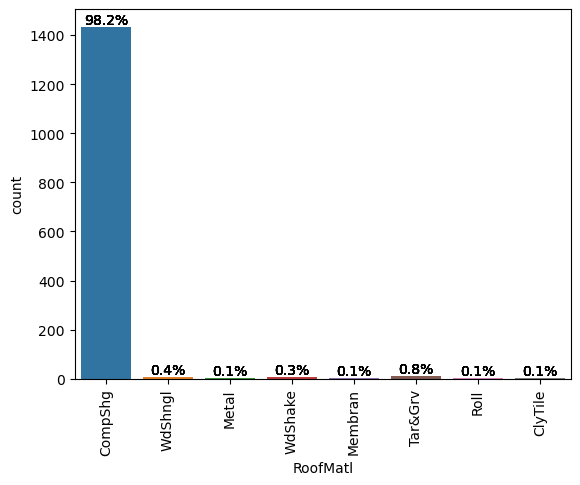

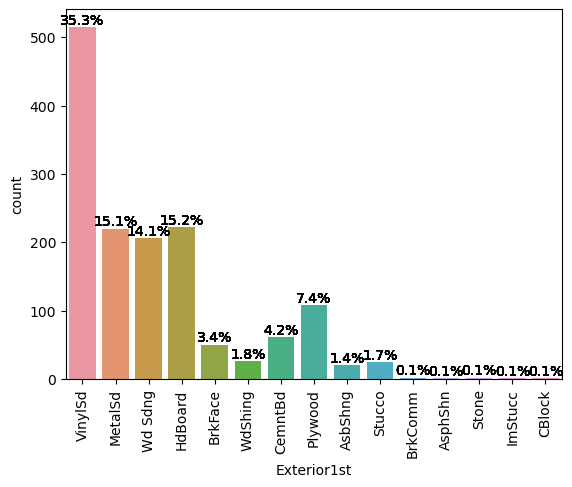

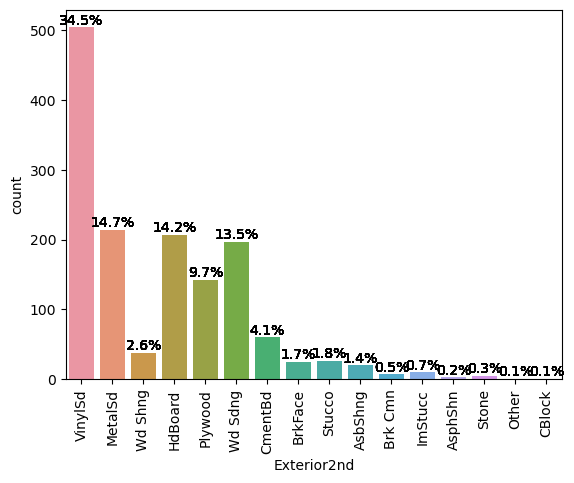

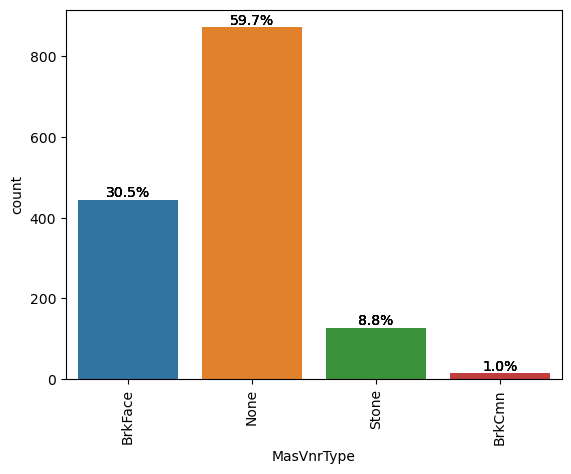

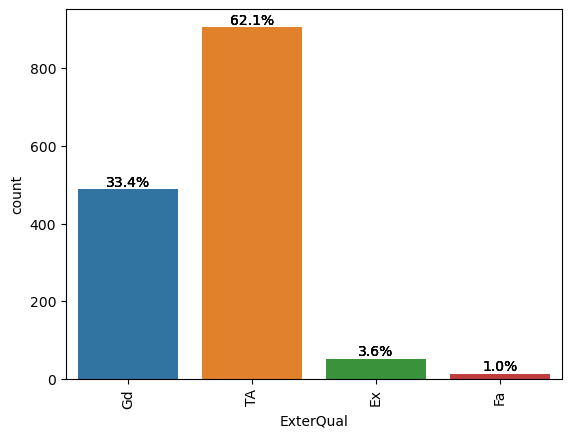

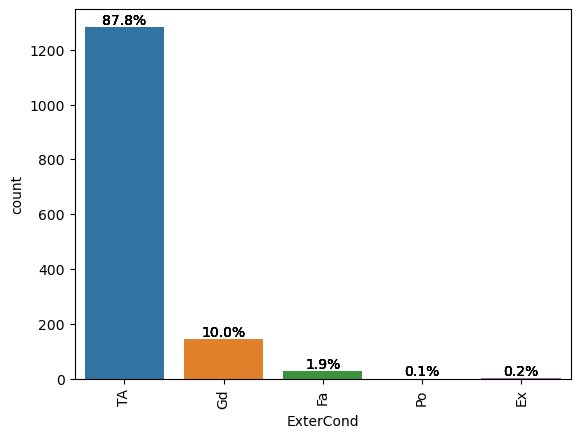

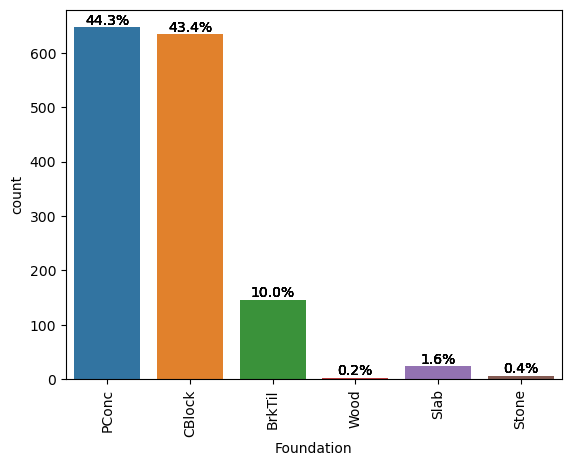

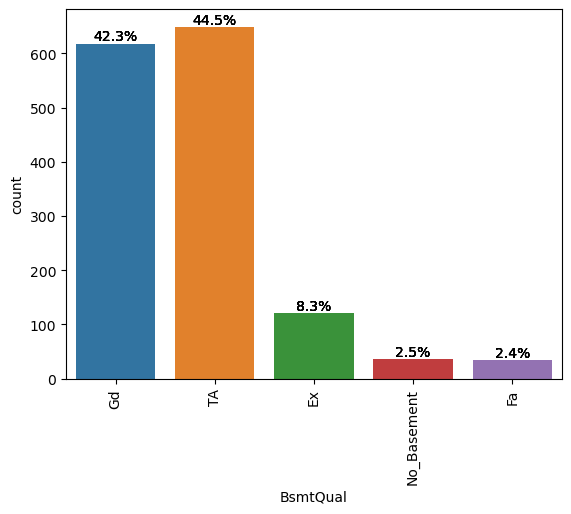

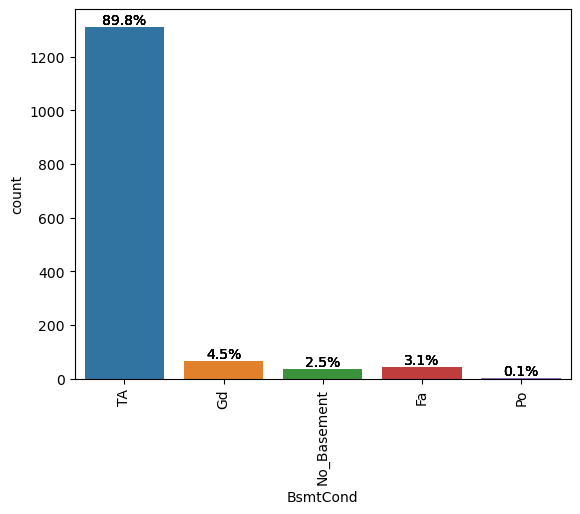

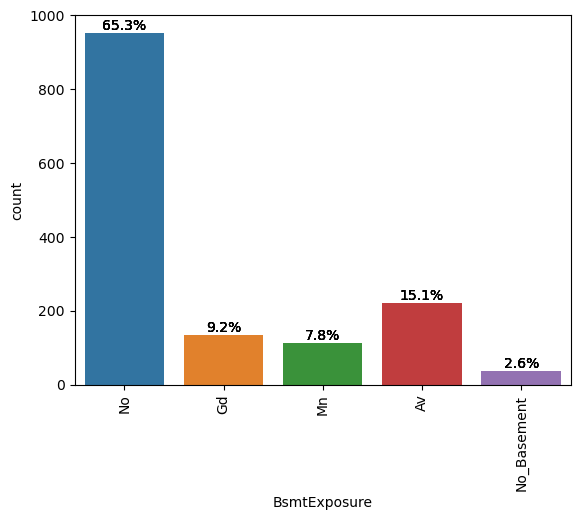

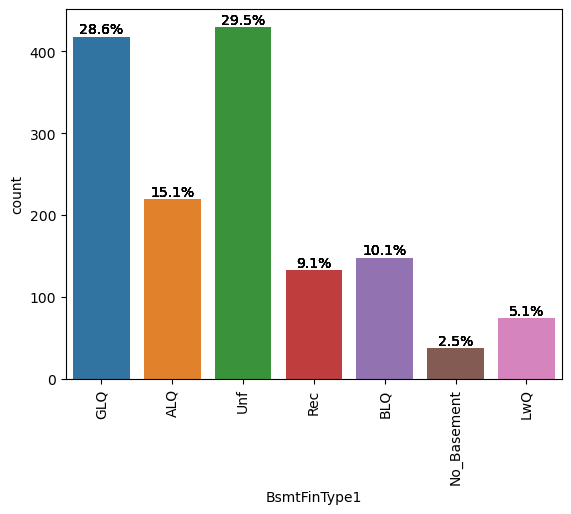

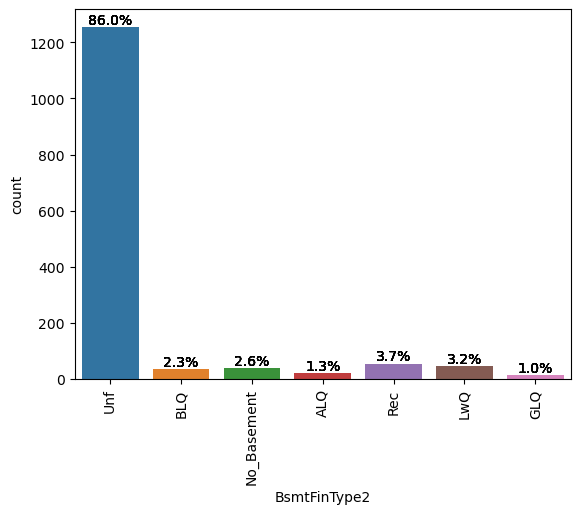

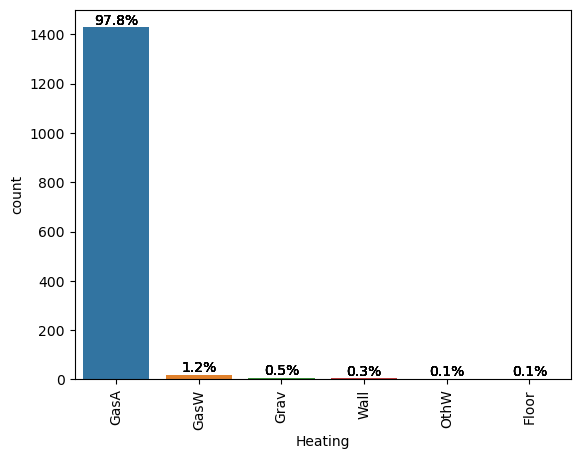

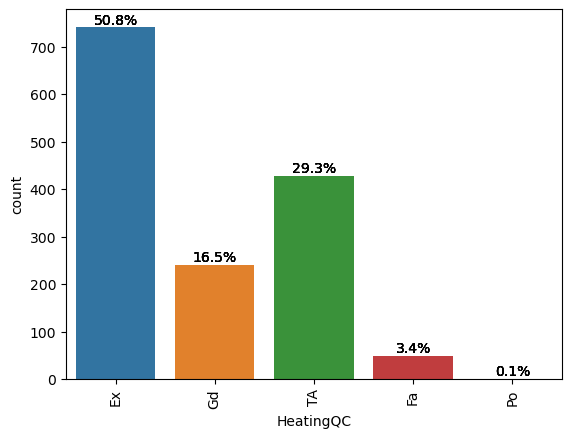

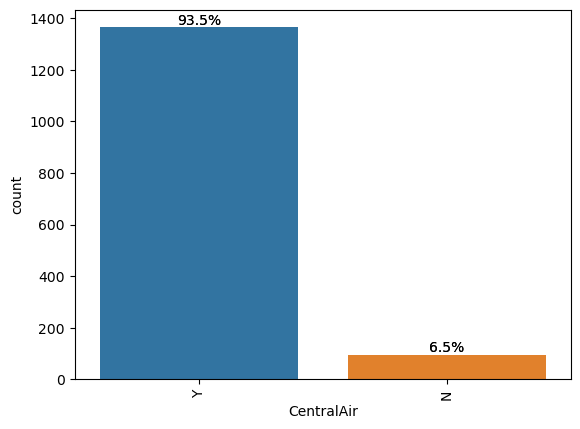

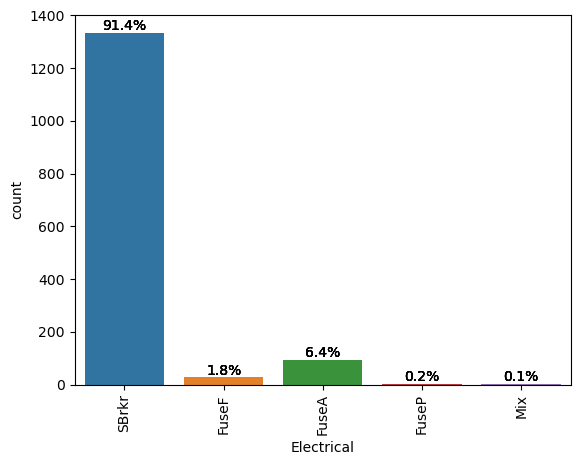

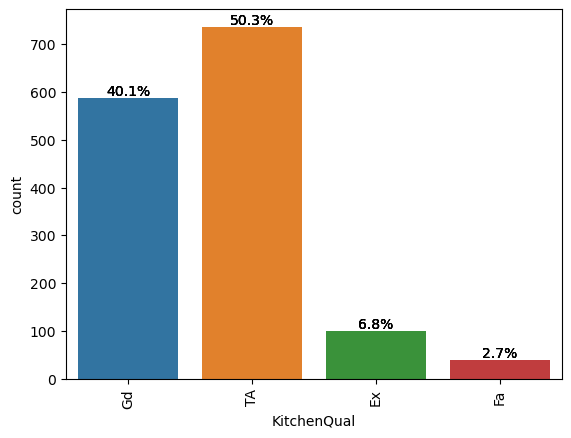

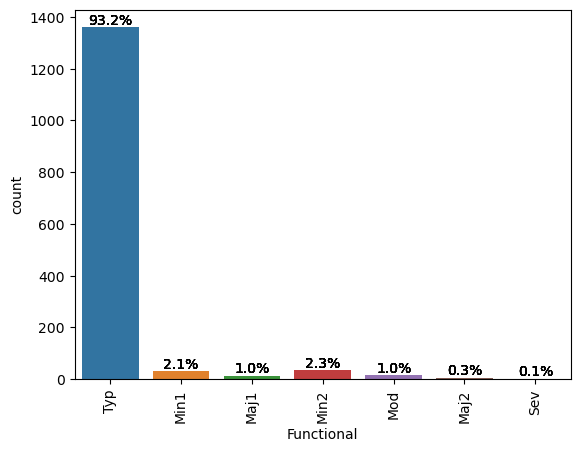

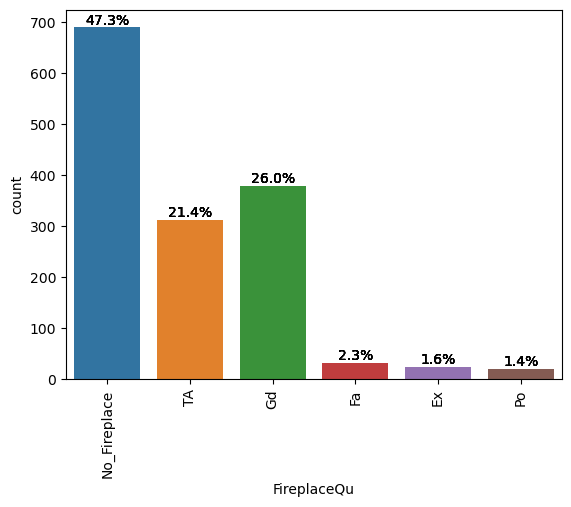

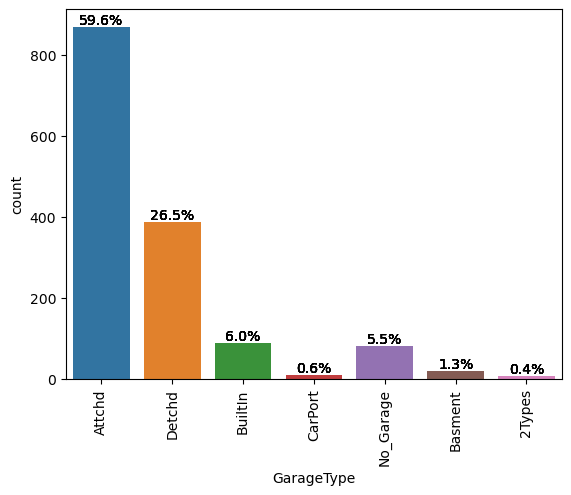

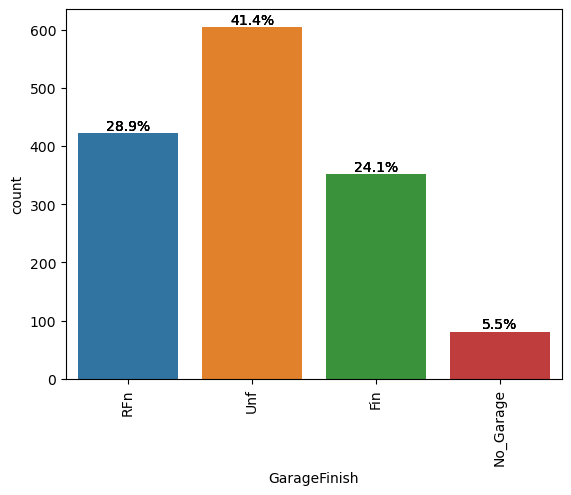

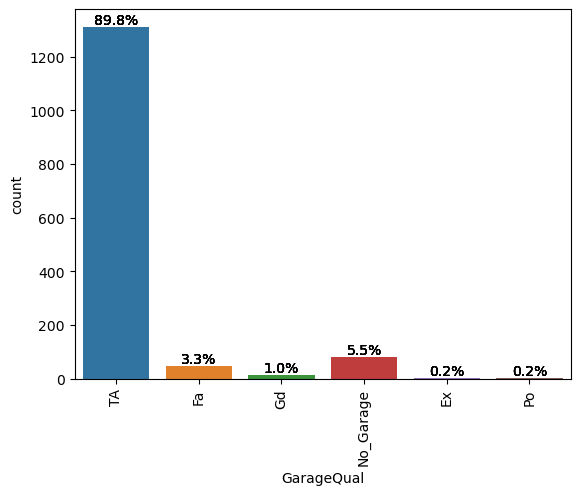

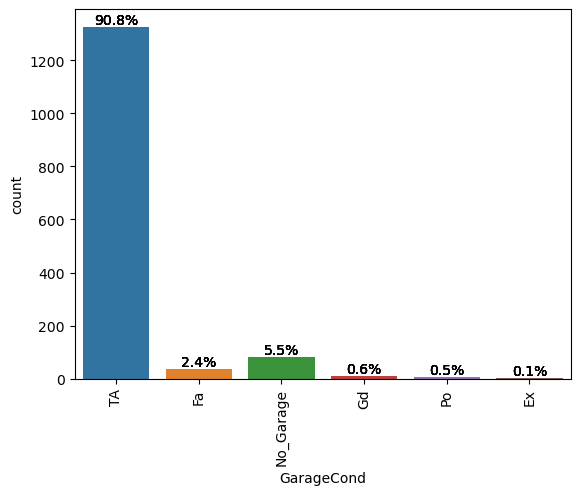

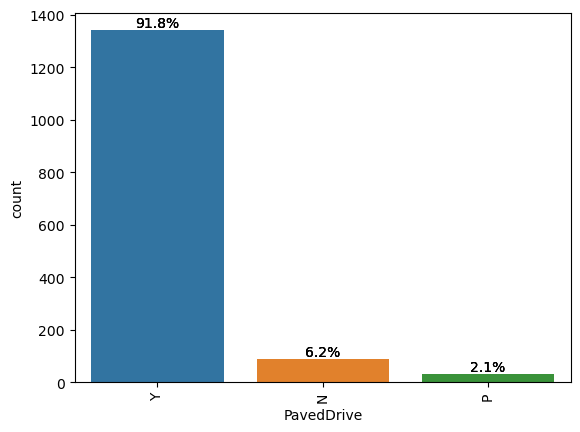

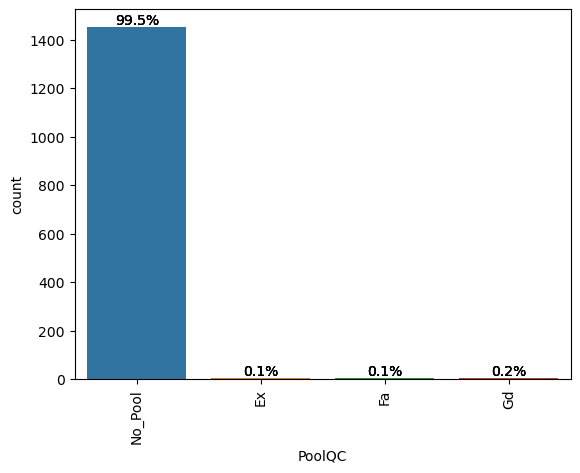

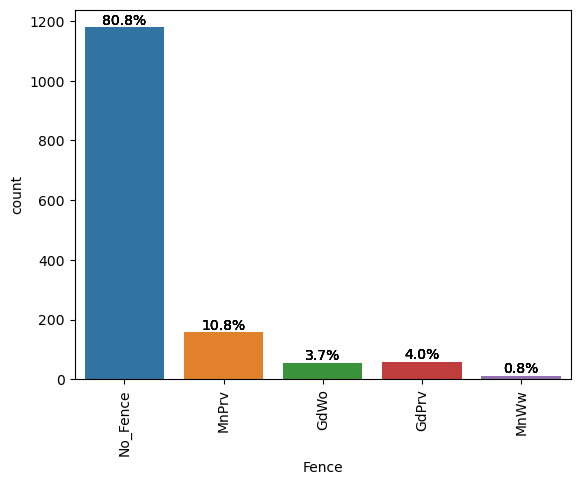

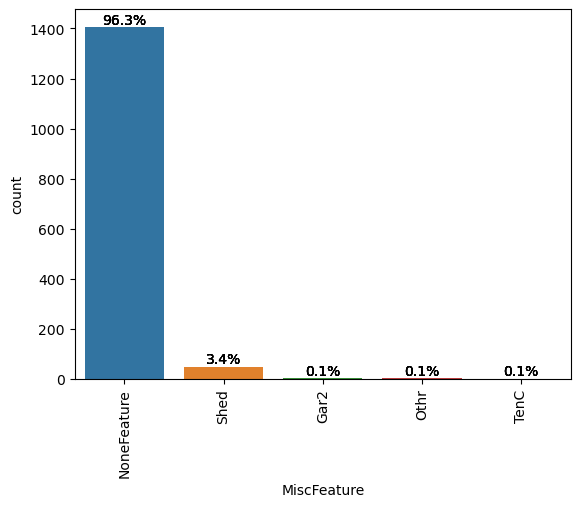

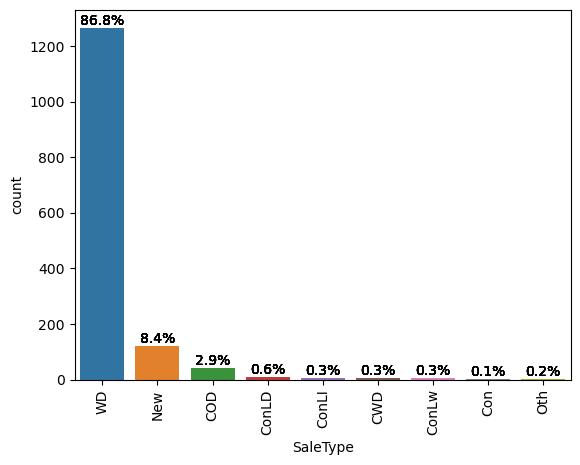

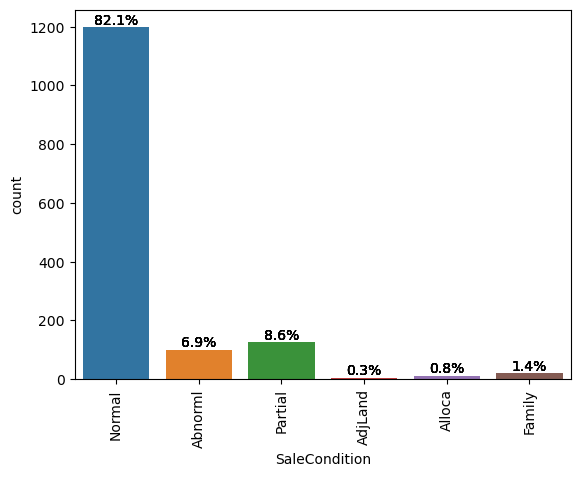

In [24]:
total_rows = housepricing.shape[0]
for i in range(len(categorical_colums)):
    pltAxes = sns.countplot(data = housepricing, x = categorical_colums[i])
    pltAxes.set_xlabel(categorical_colums[i])
    pltAxes.set_xticklabels(pltAxes.get_xticklabels(), rotation=90)
    for p in pltAxes.patches:
        height = p.get_height()
        if np.isnan(height):
            height=0
        #pltAxes.text(p.get_x()+p.get_width()/2., height, '{:1.2f}%'.format((height/total_rows)*100), ha="center")
        pltAxes.bar_label(pltAxes.containers[0], fmt=lambda x: f'{(x/total_rows)*100:0.1f}%')
    plt.show()

##### Observations from Univariate analysis of Categorical data
Below columns clearly show a trend where data seems tobe of unique values are more when compared with other values.
So dropping these columns ::\
Street\
Alley\
Utilities\
LandSlope\
Condition2\
RoofMatl\
Heating\
Electrical\
Functional\
GarageCond\
PavedDrive\
PoolQC\
MiscFeature\


In [25]:
drop_columns = ['Street','Alley','Utilities','LandSlope','Condition2','RoofMatl','Heating','Electrical','Functional','GarageCond','PavedDrive','PoolQC','MiscFeature']
housepricing.drop(drop_columns, axis=1, inplace=True)

#### Univariate Analysis for numerical columns

In [26]:
# Get summary statistics for each numeric column we have in the current data frame
housepricing_numeric = housepricing[numerical_colums]
housepricing_numeric.describe()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,69.863699,10516.828082,1971.267808,1984.865753,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.589041,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753
std,22.027677,9981.264932,30.202904,20.645407,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,23.997022,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095
min,21.000000,1300.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,60.000000,7553.500000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1962.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,69.000000,9478.500000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,79.000000,11601.500000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,313.000000,215245.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000


In [ ]:
for colName in numerical_colums:
    plt.boxplot(housepricing[colName])
    plt.show()

In [ ]:
def remove_outliers_IQR_method(col_name):
    global housepricing
    q1 = housepricing[col_name].quantile(0.25)
    q3 = housepricing[col_name].quantile(0.75)
    iqr = q3 - q1
    low_fence = q1 - 1.5*iqr
    high_fence = q3 + 1.5*iqr
    housepricing = housepricing[ (housepricing[col_name]>=low_fence) & (housepricing[col_name]<=high_fence)]

In [ ]:
for colName in numerical_colums:
    remove_outliers_IQR_method(colName)
    
for colName in numerical_colums:
    plt.boxplot(housepricing[colName])
    plt.show()

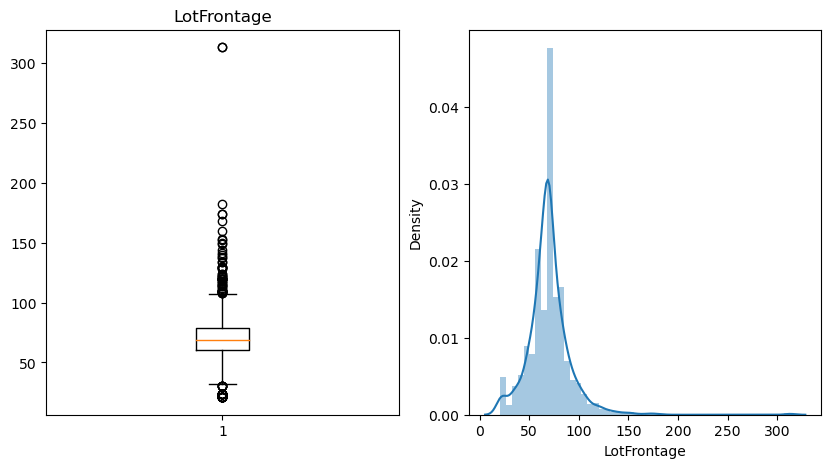

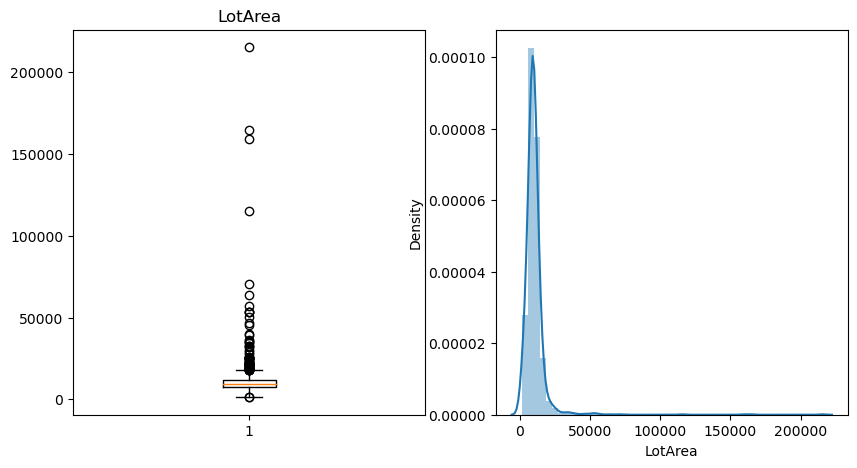

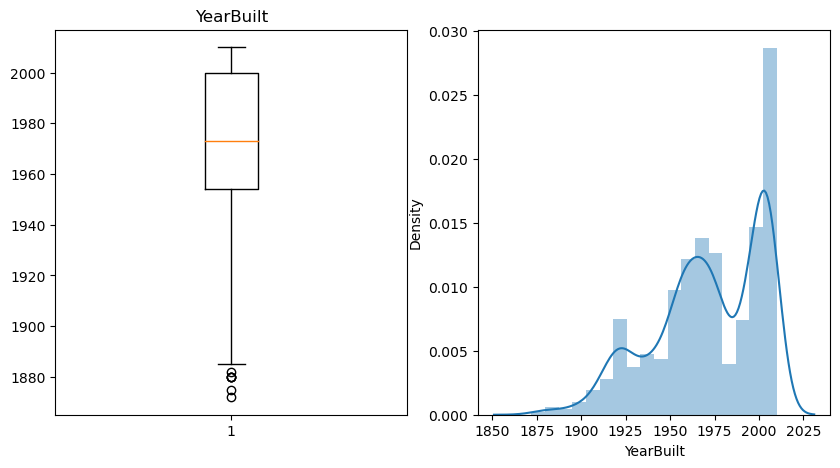

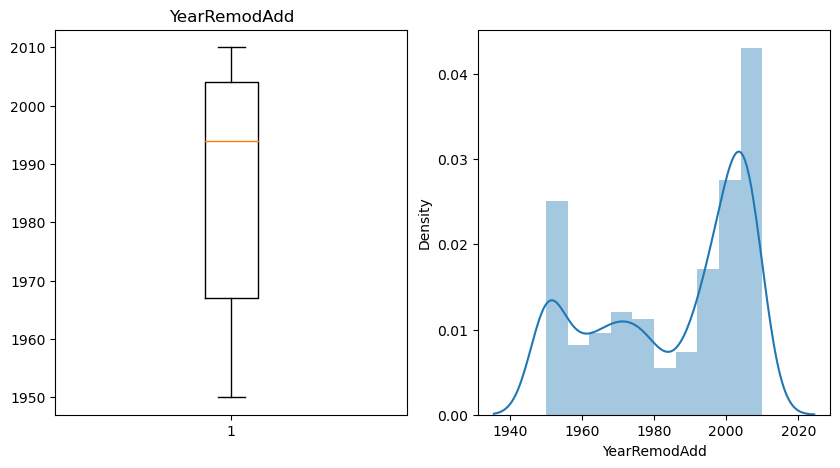

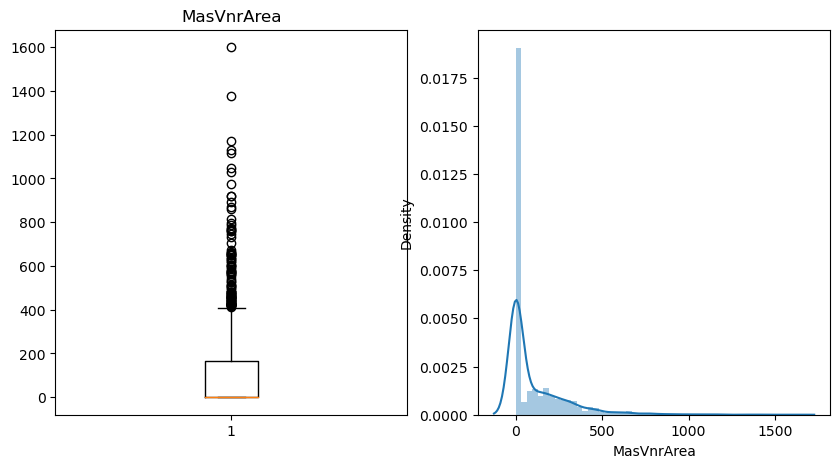

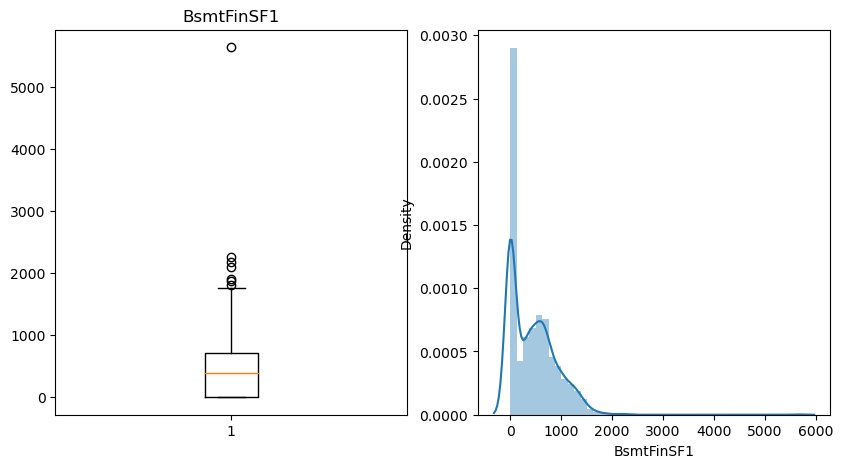

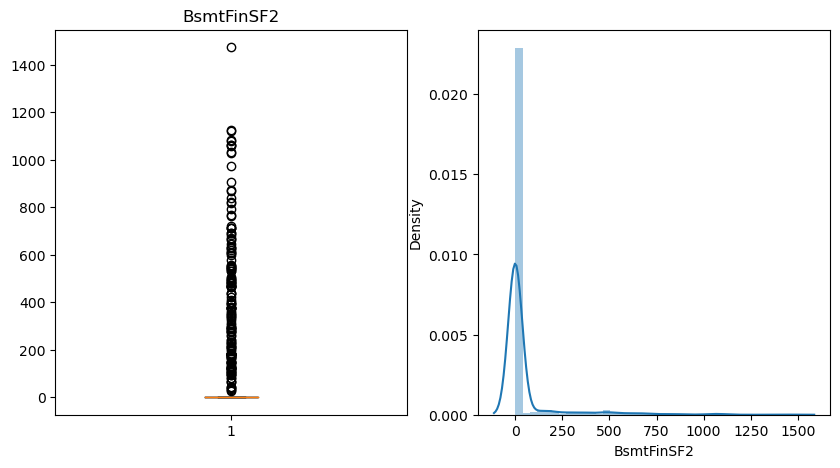

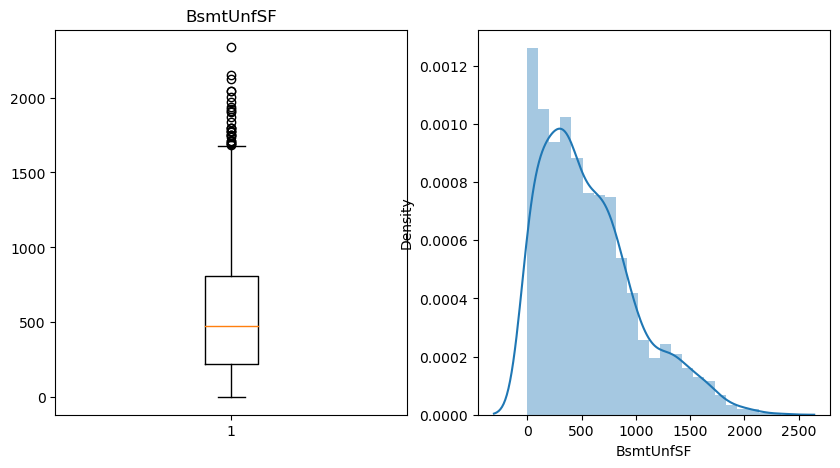

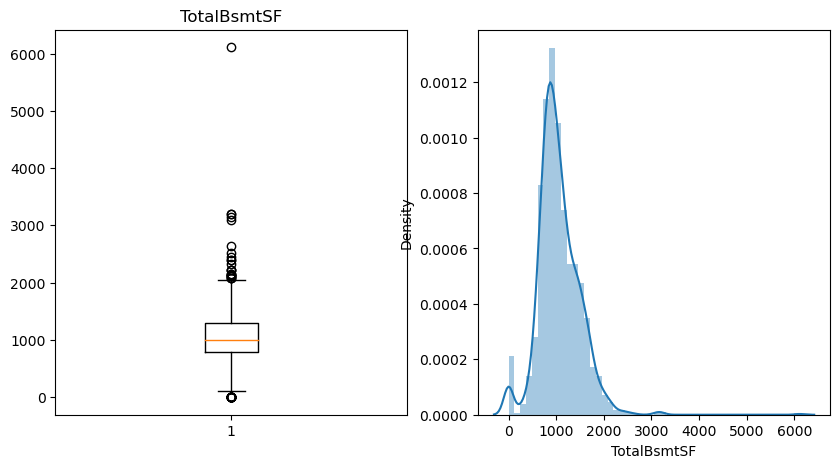

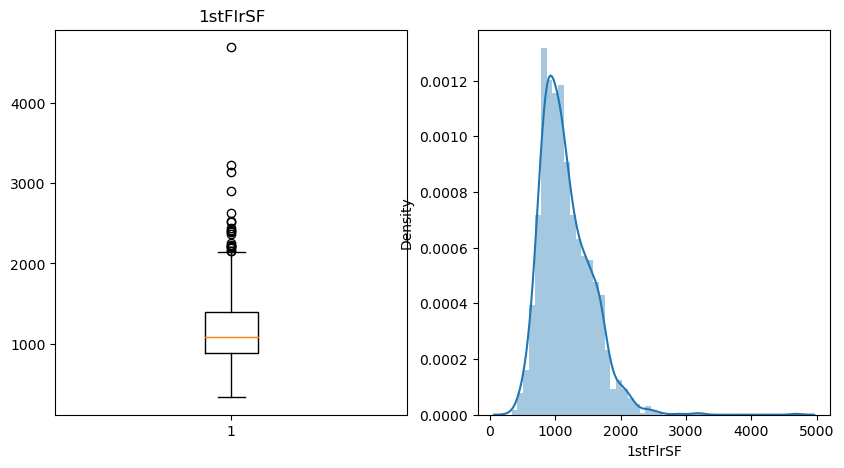

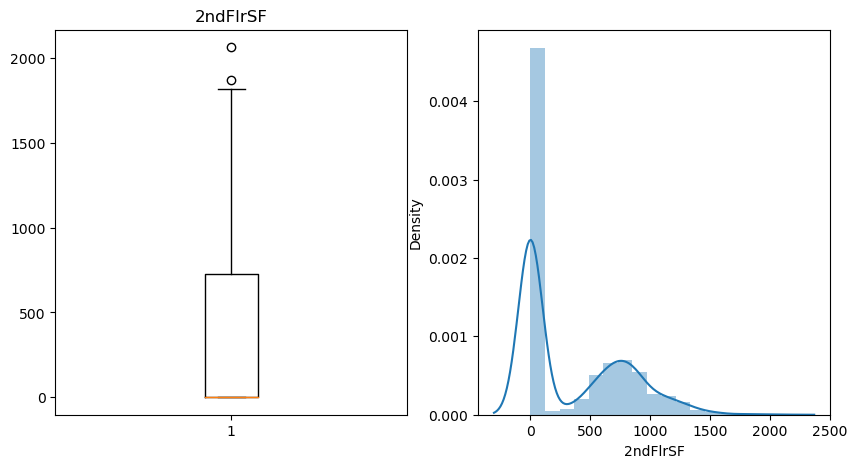

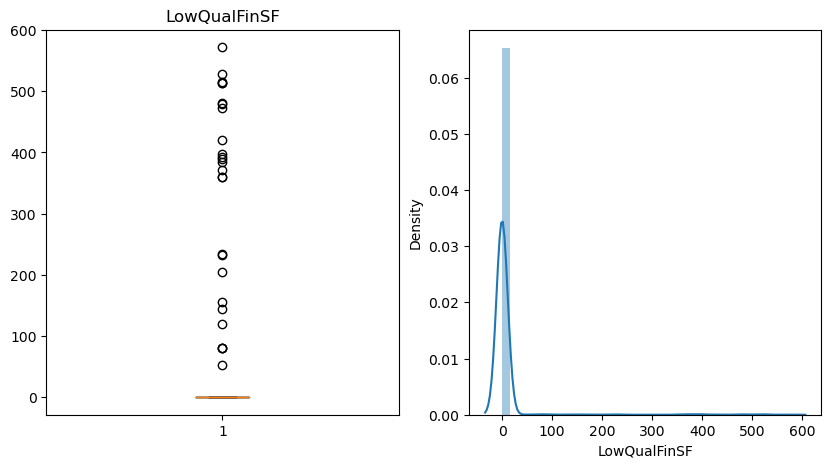

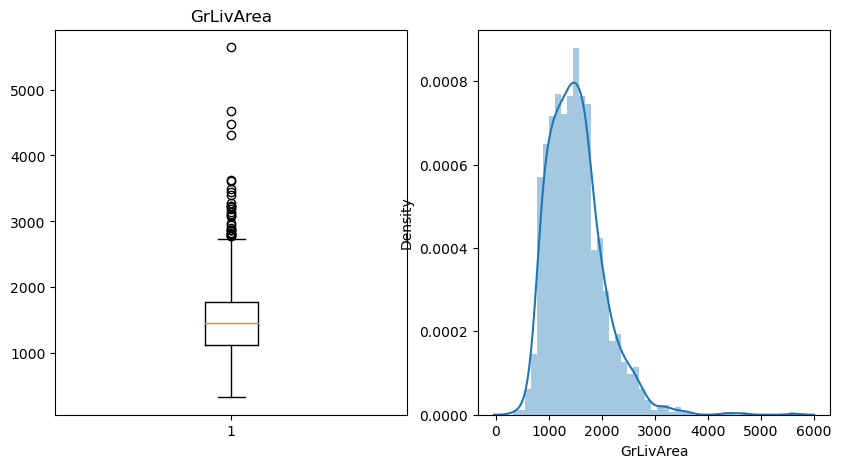

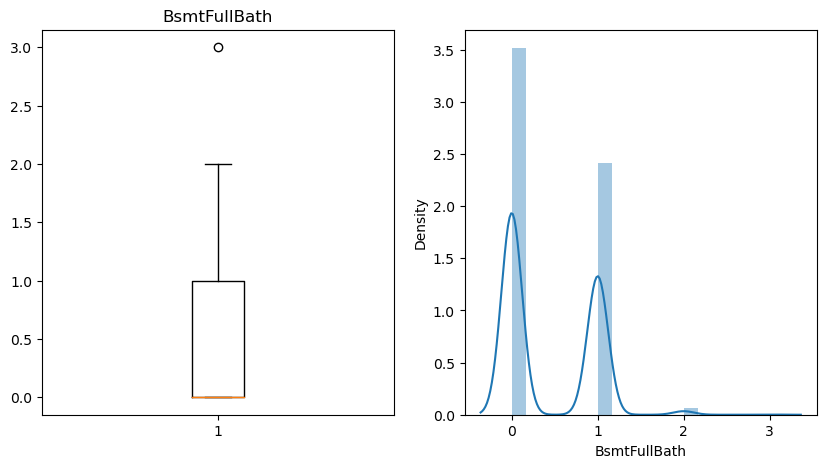

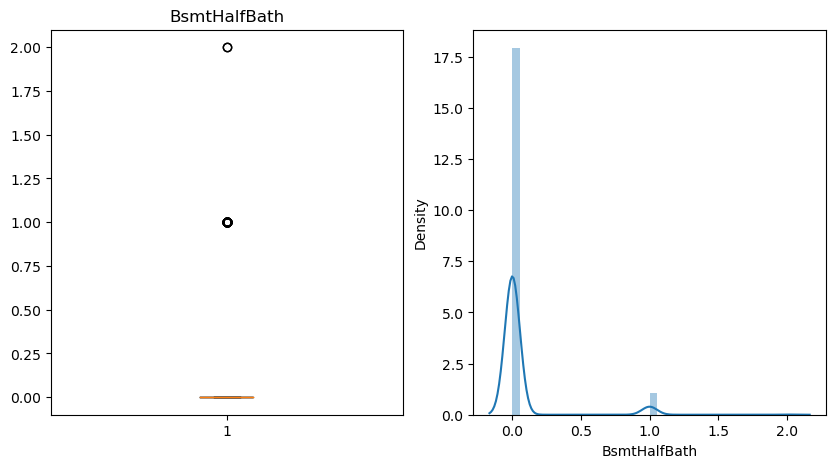

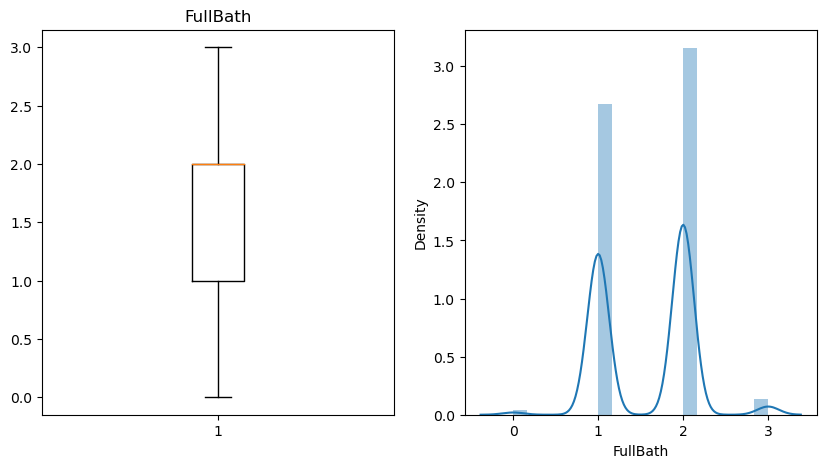

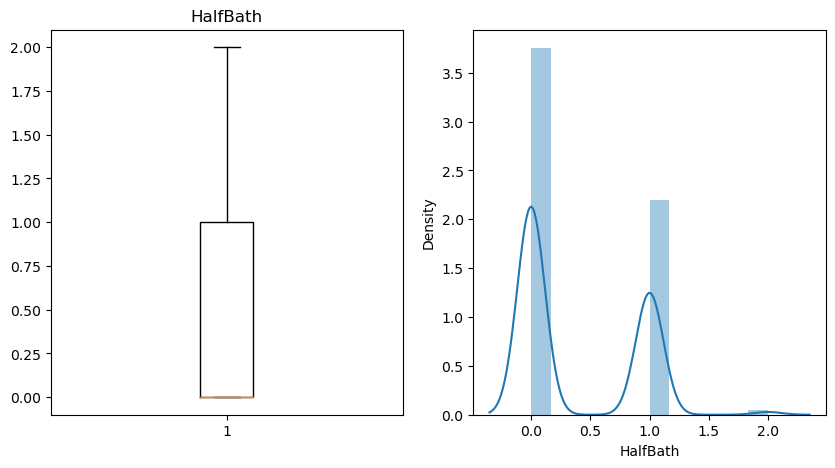

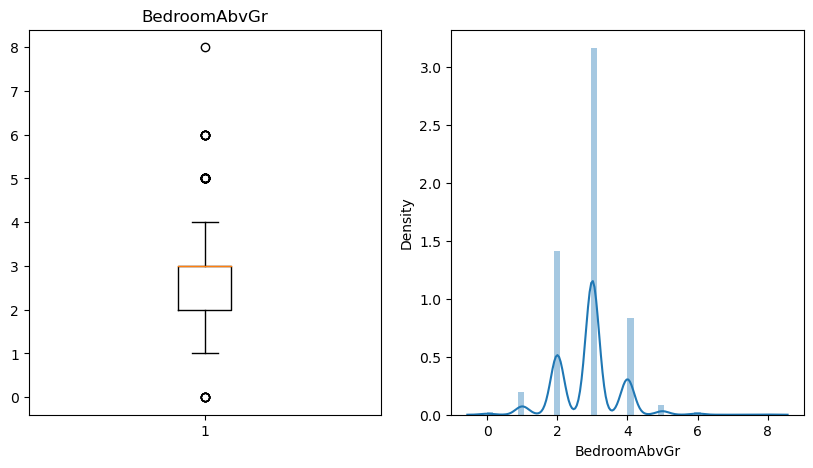

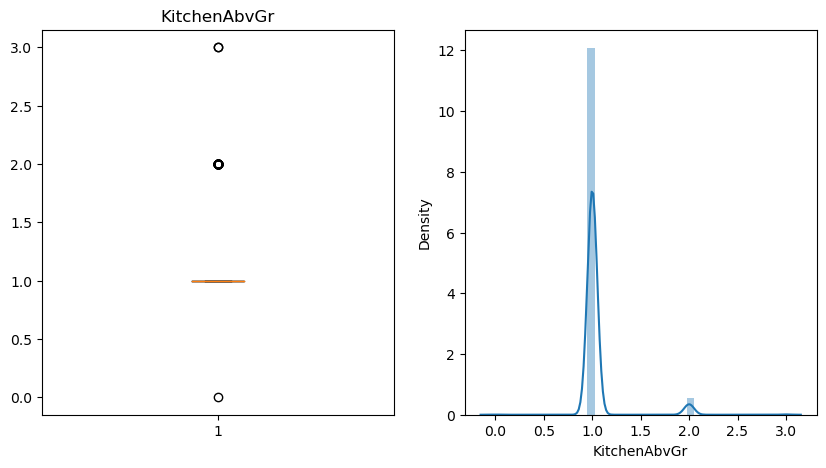

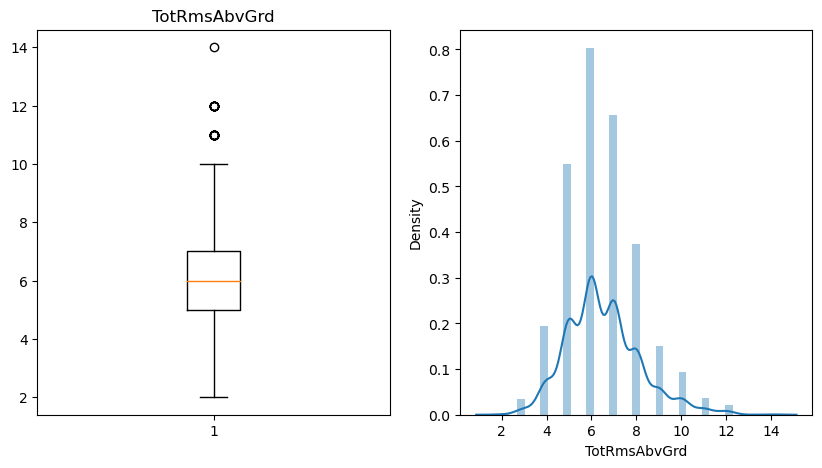

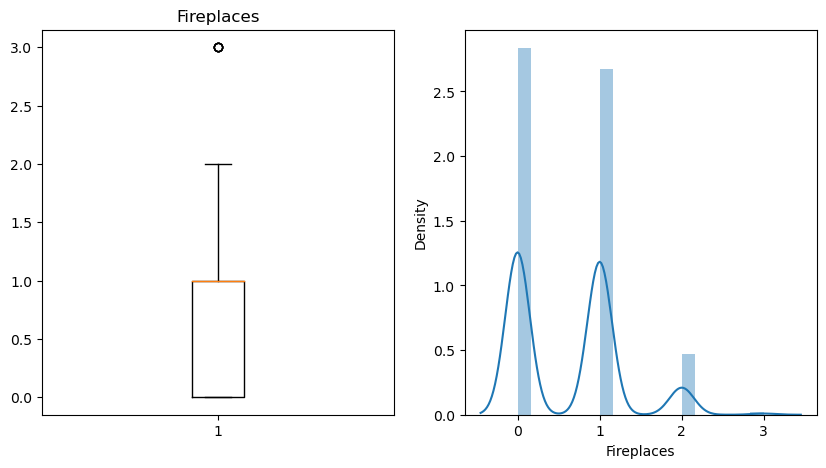

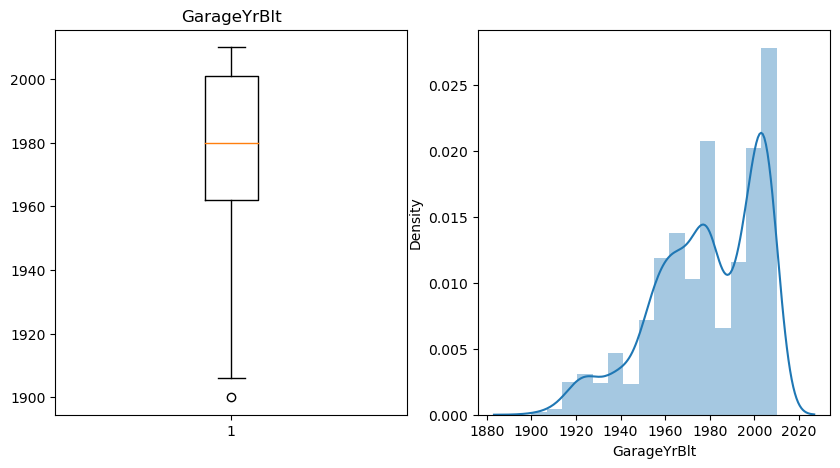

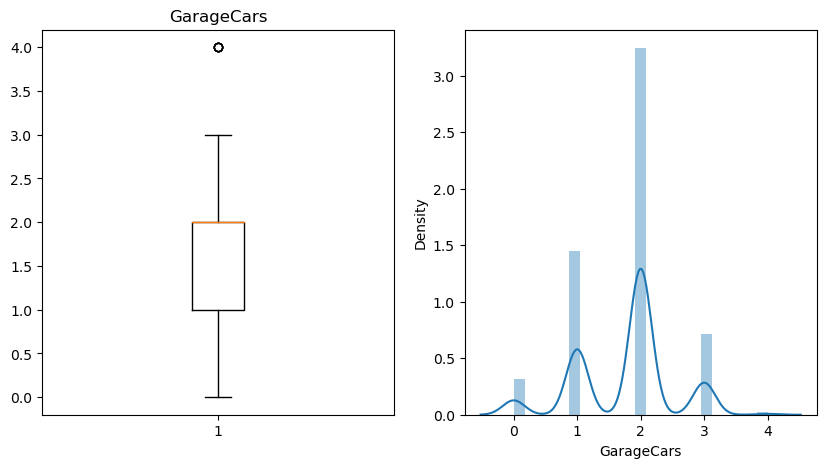

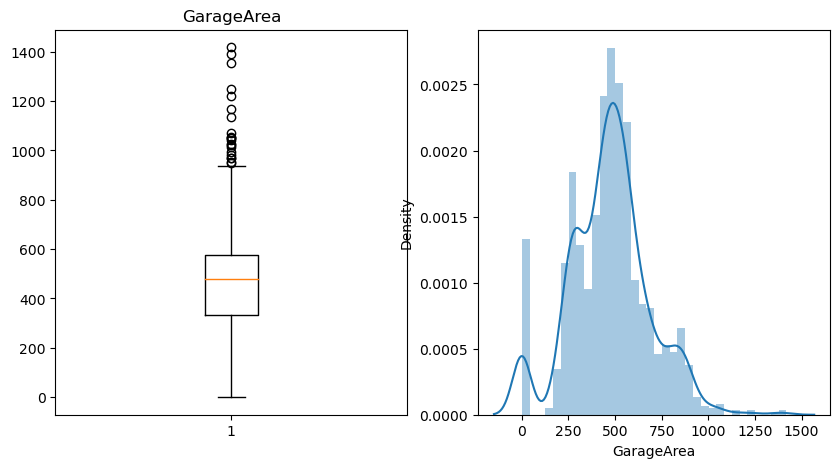

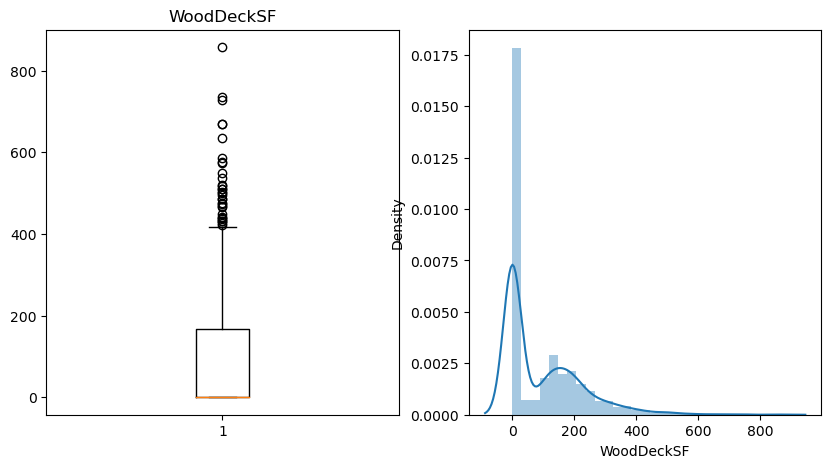

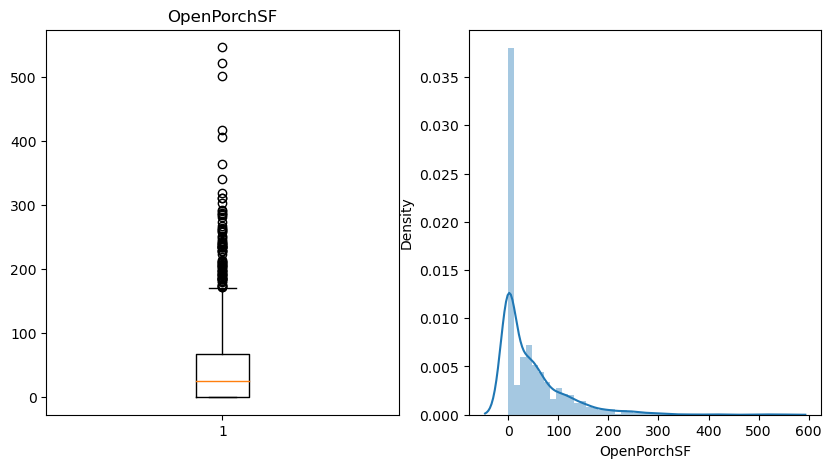

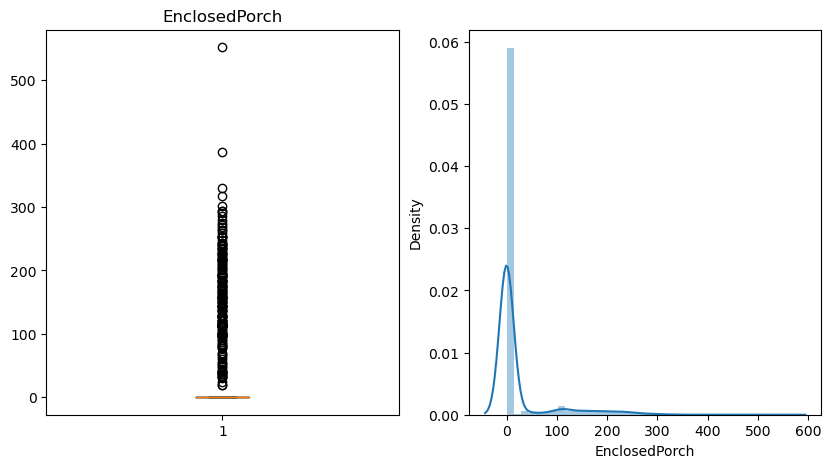

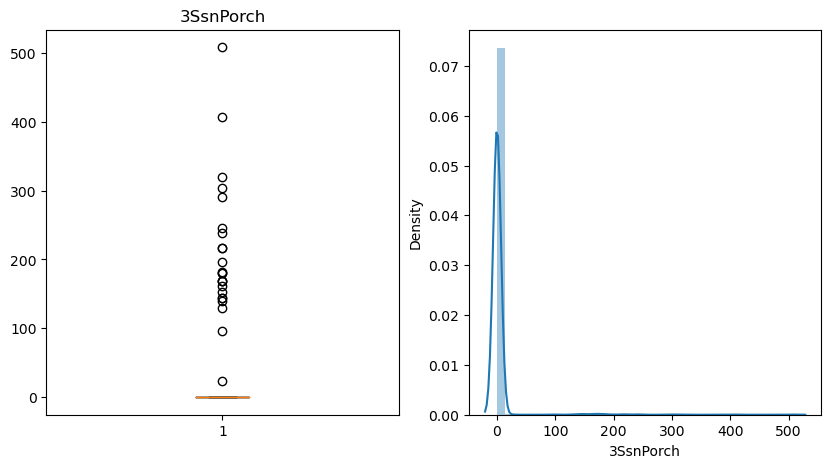

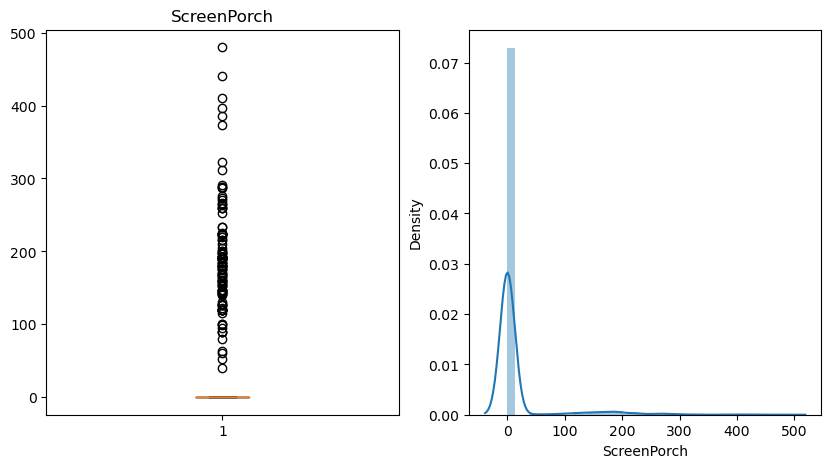

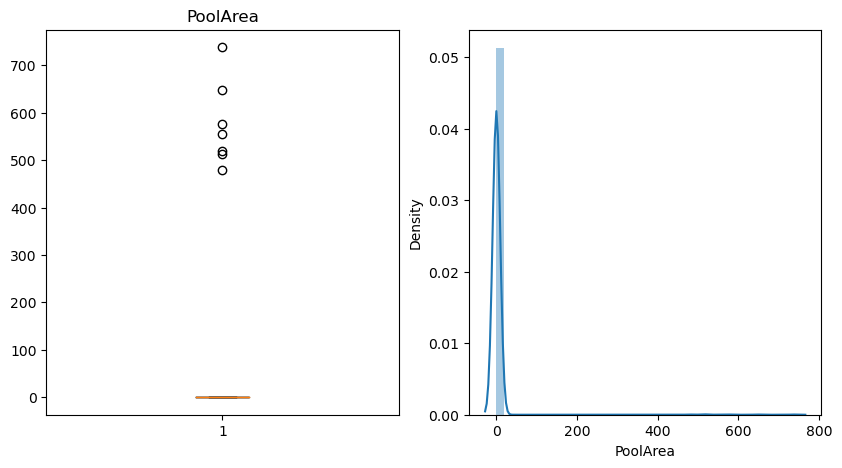

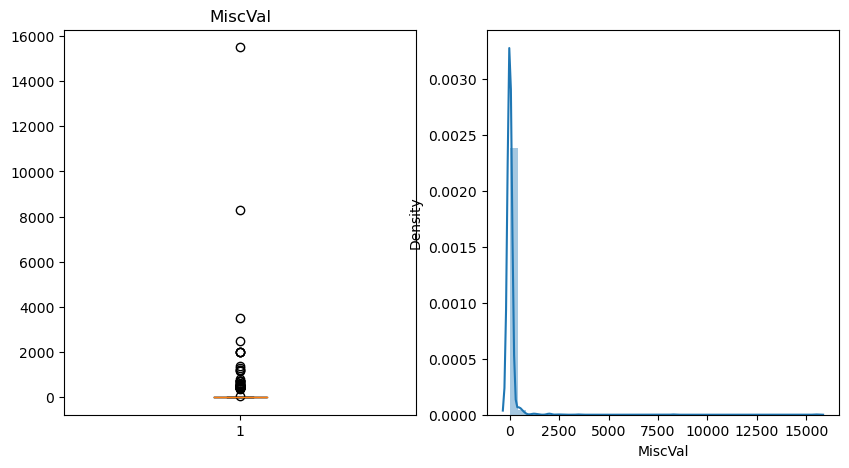

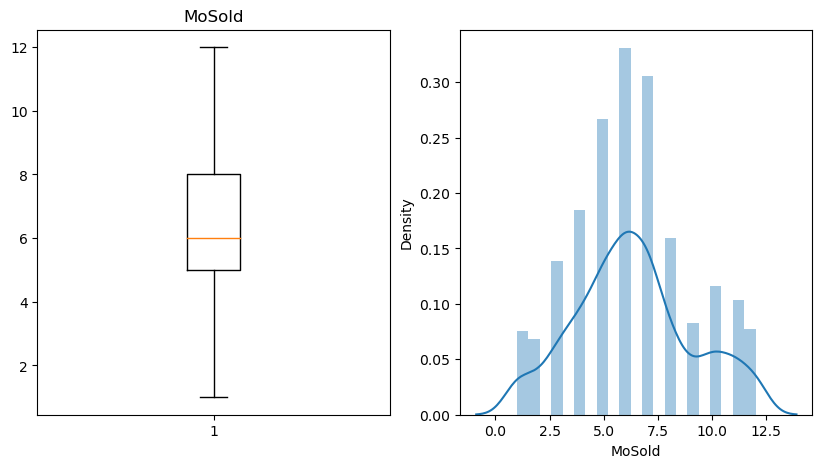

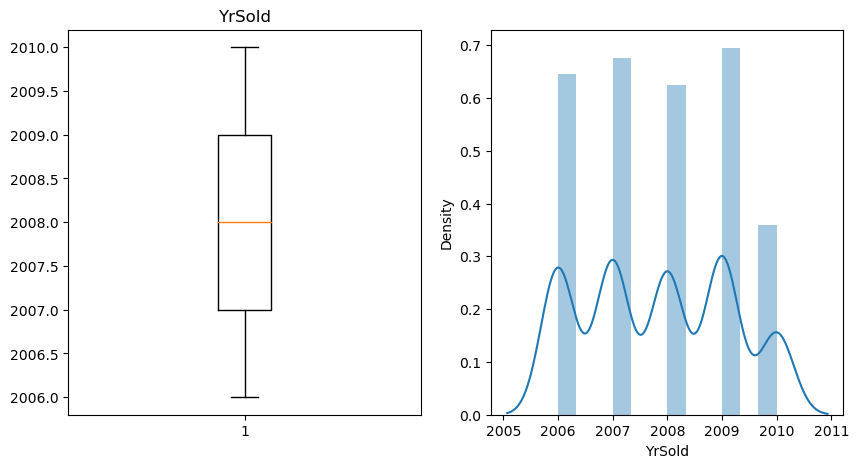

In [35]:
for colName in numerical_colums:
    plt.figure(figsize=[10,5])
    plt.subplot(1,2,1)
    plt.boxplot(housepricing[colName])
    plt.title(colName)
    plt.subplot(1,2,2)
    sns.distplot(housepricing[colName])
    plt.show()

##### Observations - to drop columns which are of category constant feature (above 90% of them are having same value)
Below columns clearly show a trend where data seems to be of having a unique/constant value with more than 90%.
So dropping these columns ::\
BsmtFinSF2\
LowQualFinSF\
BsmtHalfBath\
KitchenAbvGr\
EnclosedPorch\
3SsnPorch\
ScreenPorch\
PoolArea\
MiscVal

In [36]:
drop_columns = ['BsmtFinSF2','LowQualFinSF','BsmtHalfBath','KitchenAbvGr','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal']
housepricing.drop(drop_columns, axis=1, inplace=True)

In [37]:
housepricing.shape

(1460, 58)